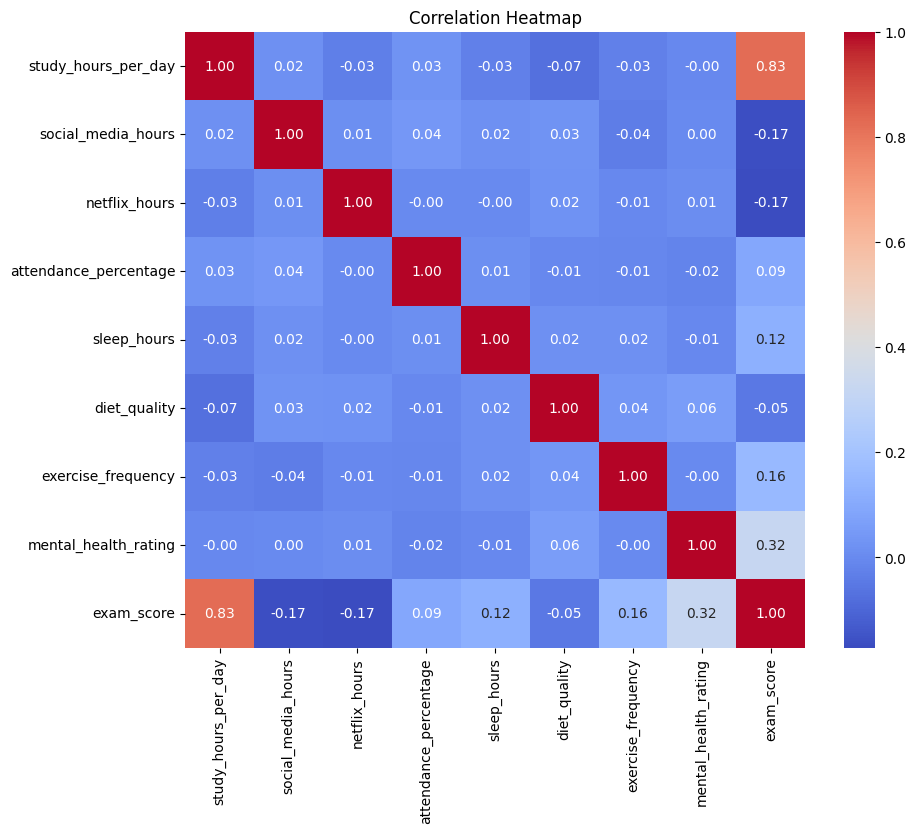

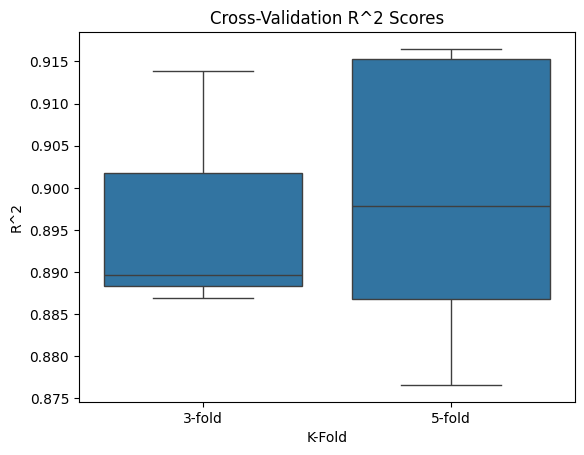

,Metric,Value
0,R2,0.898480
1,MSE,26.032621
2,MAE,4.131195
3,RMSE,5.102217
4,MAPE,0.068318
5,Explained Variance,0.898482
6,Pearson r,0.948106
7,Spearman ρ,0.942253


Mean 3-Fold Cross-Validation R² Scores: 0.8968176325758935
Mean 5-Fold Cross-Validation R² Scores: 0.8985914092531921


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, explained_variance_score
from scipy.stats import pearsonr, spearmanr

# Load data
df = pd.read_csv('student_habits_performance.csv')

# Features and target
keep_features = ['study_hours_per_day', 'social_media_hours', 'netflix_hours',
            'attendance_percentage', 'sleep_hours', 'diet_quality',
            'exercise_frequency', 'mental_health_rating', 'exam_score']

df = df[keep_features]

#  encode categorical variable
df['diet_quality'] = LabelEncoder().fit_transform(df['diet_quality'])

# Final feature matrix X and target vector y
X = df.drop(columns=['exam_score'])
y = df['exam_score']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# using BGD with SGDRegressor
model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='invscaling', eta0=0.01, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Cross-validation (3-fold and 5-fold)
cv_results = {}
for k in [3, 5]:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    cv_results[f"{k}-fold"] = scores

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
pearson_corr, _ = pearsonr(y_test, y_pred)
spearman_corr, _ = spearmanr(y_test, y_pred)
mean_3_fold_r2 = np.mean(cv_results["3-fold"])
mean_5_fold_r2 = np.mean(cv_results["5-fold"])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[keep_features].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


    
cv_df = pd.DataFrame([(fold, score) for fold, scores in cv_results.items() for score in scores],
                     columns=["K-Fold", "R2 Score"])
# Cross-validation boxplot
sns.boxplot(x="K-Fold", y="R2 Score", data=cv_df)
plt.title("Cross-Validation R^2 Scores")
plt.ylabel("R^2")
plt.show()


# Print metrics
metrics = pd.DataFrame({
    "Metric": ["R2", "MSE", "MAE", "RMSE", "MAPE", "Explained Variance", "Pearson r", "Spearman ρ"],
    "Value": [r2, mse, mae, rmse, mape, explained_var, pearson_corr, spearman_corr]
})
display(metrics)
print(f"Mean 3-Fold Cross-Validation R² Scores: {mean_3_fold_r2}")
print(f"Mean 5-Fold Cross-Validation R² Scores: {mean_5_fold_r2}")



Confusion Matrix:
[[ 51   0]
 [ 49 100]]


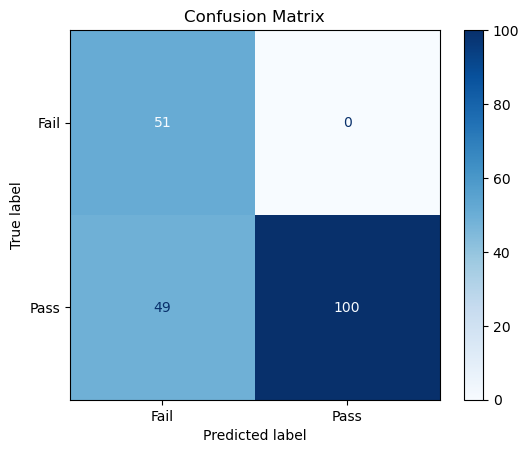

In [22]:
df = pd.read_csv('student_habits_performance.csv')

keep_features = ['study_hours_per_day', 'social_media_hours', 'netflix_hours',
                 'attendance_percentage', 'sleep_hours', 'diet_quality',
                 'exercise_frequency', 'mental_health_rating', 'exam_score']
df = df[keep_features]

# map categorical feature 'diet_quality'
df['diet_quality'] = LabelEncoder().fit_transform(df['diet_quality'])

# features to keep and which to drop
keep_features = ['study_hours_per_day', 'mental_health_rating']
optional_features = ['social_media_hours', 'netflix_hours', 'attendance_percentage',
                'sleep_hours', 'diet_quality', 'exercise_frequency']
best_model = []

for drop_feature in optional_features:
    # select features for this loop
    features = keep_features + [f for f in optional_features if f != drop_feature]
    df_ablate = df[features + ['exam_score']]

    X = df_ablate.drop(columns=['exam_score'])
    y = df_ablate['exam_score']

    # standardizing
    X_scaled = StandardScaler().fit_transform(X)

    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # train model
    model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='invscaling', eta0=0.01, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)
    pearson_corr, _ = pearsonr(y_test, y_pred)
    spearman_corr, _ = spearmanr(y_test, y_pred)

    # print result
    print(f"Dropped: {drop_feature} -> R²: {r2:.4f} MSE: {mse:.4f}")
    best_model.append((drop_feature, r2, mse, mae, rmse, mape, pearson_corr, spearman_corr))


drop_metrics = pd.DataFrame(best_model, columns=["Dropped Feature", "R2 Score", "MSE", "MSE", "RMSE", "MAPE", "Pearson Score", "Spearman Score"])
display(drop_metrics)
